This Dataset is from a car production company and these are the details of their previous customers.
This company wants to analyze the dataset and build a machine learning model so they can target
their future customers accordingly. The company is only interested to predict that a customer will purchase
a car or not, this means that the company wants a binary option. From the statement above, this is a CLASSIFICATION PROBLEM. Here I'm going to analyze the dataset with some classification machine learning model, and I will test the accuracy of the model applied on the dataset and compare all the models to find out which one is the best model for the dataset.


# Importing the Various Python Libaries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [178]:
Dataset = pd.read_csv('CustomerList.csv')
Dataset.head()

,Customer ID,Gender,Age,Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0


# DATA SUMMARY

In [179]:
Dataset.shape

(400, 5)

In [180]:
Dataset.columns

Index(['Customer ID', 'Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

In [181]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
Customer ID    400 non-null int64
Gender         400 non-null object
Age            400 non-null int64
Salary         400 non-null int64
Purchased      400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [182]:
Dataset.describe()

,Customer ID,Age,Salary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,37.655000,69742.500000,0.357500
std,115.614301,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,100.750000,29.750000,43000.000000,0.000000
50%,200.500000,37.000000,70000.000000,0.000000
75%,300.250000,46.000000,88000.000000,1.000000
max,400.000000,60.000000,150000.000000,1.000000


# CHECKING FOR MISSING VALUES

In [183]:
Dataset.isnull().sum()

Customer ID    0
Gender         0
Age            0
Salary         0
Purchased      0
dtype: int64

This implies that there are no missing values in the dataset.

# Checking for Duplicated Values

In [216]:
duplicate =Dataset.duplicated()
sum(duplicate)

0

This shows that there are no duplicated values in the dataset

[Text(0, 0, 'Customer ID'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'Salary'),
 Text(0, 0, 'Purchased')]

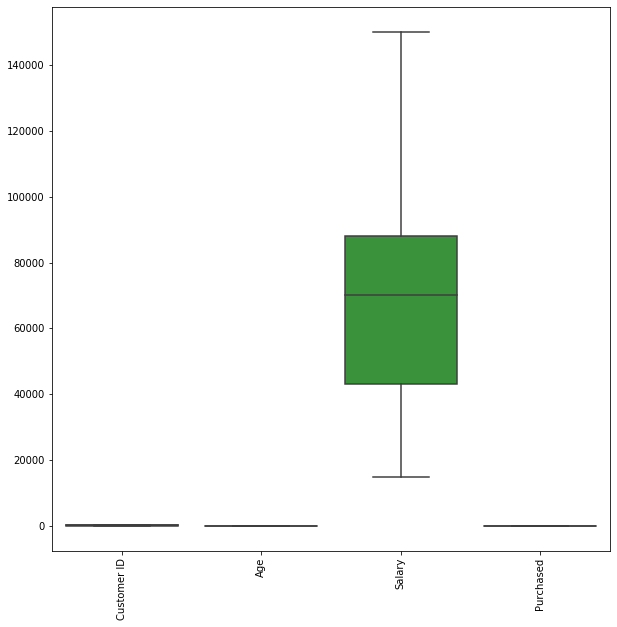

In [185]:
fig, ax = plt.subplots(figsize =(10,10))
all =sns.boxplot(data =Dataset)
all.set_xticklabels(all.get_xticklabels(), rotation = 90)

# Selecting the dependent and independent variable

In [188]:
X = Dataset.iloc[:, [2,3]].values
Y = Dataset.iloc[:, 4].values


# Split the Dataset into train and test set

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Feature Scaling

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Applying Logistic regression Algorithm on the dataset

In [191]:
# Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [193]:
#Predicted Probability
var_prob = classifier.predict_proba(X_test)


In [194]:
#Checking the performence or accuracy of the Logistic regression model
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [195]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('The accuracy of the Logistic regression model is',accuracy_score(Y_pred,Y_test))

The accuracy of the Logistic regression model is 0.89


# Applying K-Nearest Neighbors Algorithm (K-NN) to the model 

In [196]:
# Fitting k-NN to Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [197]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [198]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [199]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('The accuracy of K-Nearest Neighbors Algorithm  is',accuracy_score(Y_pred,Y_test))

The accuracy of K-Nearest Neighbors Algorithm  is 0.93


# Applying Support Vector Machine (SVM) algorithm on the dataset 

In [200]:
# Fitting SVM to Training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [201]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [202]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [203]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('The accuracy of  Support Vector Machine (SVM) algorithm is',accuracy_score(Y_pred,Y_test))

The accuracy of  Support Vector Machine (SVM) algorithm is 0.9


# Applying Decision Tree algorithm on the dataset 

In [204]:
x = Dataset.iloc[:, [2,3]].values
y = Dataset.iloc[:, 4].values

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [206]:
# Fitting Decision Tree to Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [207]:
# Predicting Test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [208]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [209]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('The accuracy of Decision Tree algorithm is',accuracy_score(y_pred,y_test))

The accuracy of Decision Tree algorithm is 0.91


# Applying Random Forest algorithm on the dataset 

In [210]:
# Fitting Random Forest Classification to Training set
from sklearn.ensemble import RandomForestClassifier
classifier  = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [211]:
# Predicting Test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [212]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]], dtype=int64)

In [213]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('The accuracy of Random Forest algorithm is',accuracy_score(y_pred,y_test))

The accuracy of Random Forest algorithm is 0.92


# Conclusion

All the Classification Machine Learning Model Applied to the dataset was good but K-Nearest Neighbors Model has a higher accuracy score. Which makes it the best model for the Dataset.
